# DWS 101 - Exercise 4 - Part A

### Μεταφόρτωση Βιβλιοθηκών

Let’s start by importing our libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# για το γράφημα
import plotly.express as px
import plotly.graph_objects as go
# train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

And define our color visualization settings:

In [2]:
px.defaults.template = "plotly_white"
color_palette = ['#26C6DA', '#7a0e00', '#FF7043', '#2E78D2']

### Ερώτημα 1

*Φορτώστε το σύνολο δεδομένων wine-missing.csv σε ένα DataFrame μέσω της
βιβλιοθήκης pandas.*

In [3]:
df_raw = pd.read_csv("data/wine-missing.csv")
df_raw.head()

*Στη συνέχεια, περιγράψτε το κάθε χαρακτηριστικό και δημιουργήστε το
αντίστοιχο ιστόγραμμα τους.*

In [4]:
df_raw.describe()

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Επομένως τα types των επιμέρους στηλών είναι σωστά. Διαχωρίζω τώρα τις
μεταβλητές στα ανεξάρτητα χαρακτηριστικά και την εξαρτημένη μεταβλητή
`type`:

In [6]:
df_X = df_raw.drop(labels = "type", axis=1)
df_y = df_raw[["type"]]

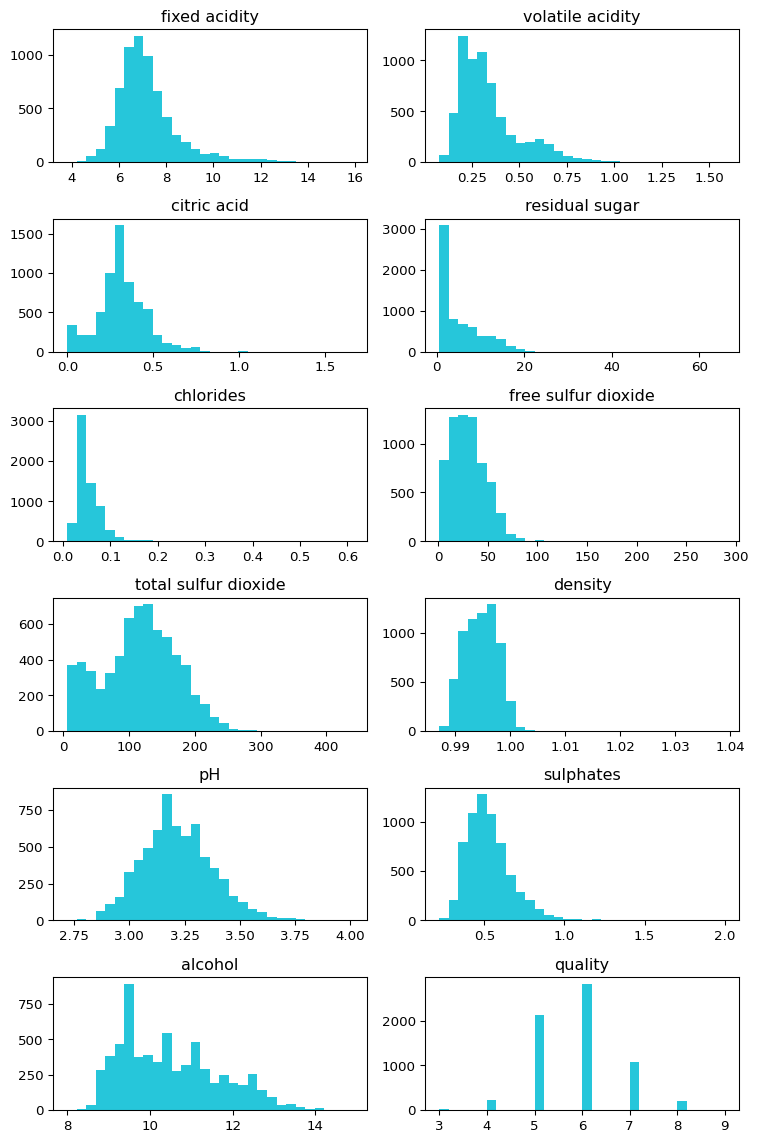

In [7]:
# Παίρνω τα ονόματα των στηλών που θέλω να δείξω στο ιστόγραμμα
column_names = df_X.columns

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 12))
# για να το μετατρέψω από πίνακα σε διάνυσμα
axes = axes.flatten()

for i, column in enumerate(column_names):
    axes[i].hist(df_X[column], bins=30, color=color_palette[0], edgecolor=None)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()
# df_X.shape

**Σχολιασμός**

-   Οι κατανομές των fixed acidity, volatile acidity, citric acid,
    residual sugar, chlorides, free & total sulfur dioxide και sulphates
    παρουσιάζουν θετική λοξότητα, δηλαδή τα περισσότερα κρασιά
    παρουσιάζουν σχετικά χαμηλές τιμές, και λιγότερα είναι αυτά με
    μεγαλύτερες τιμές.
-   Το residual sugar συγκεκριμένα, φαίνεται να έχει λογαριθμική
    κατανομή.
-   Density και pH έχουν κατανομή που πλησιάζει την κανονική. Η
    πυκνότητα φαίνεται να έχει μάλιστα ένα περιορισμένο εύρος τιμών
    \[0.989 - 1.002\].
-   Η ποιότητα είναι διακριτή μεταβλητή, με τις περισσότερες τιμές να
    είναι 5, 6 ή 7.

*Για τη μεταβλητή Type, να δημιουργηθεί ραβδόγραμμα για τις τιμές white,
red και unknown, όπου unknown είναι άγνωστο αν τα δείγματα κρασιού ήταν
λευκά ή κόκκινα.*

In [8]:
fig = px.bar(df_y, x='type', title="Type of Wine - Count")

fig.update_traces(dict(marker_line_width=0), marker_color=color_palette[0])
fig.show()

In [9]:
print(df_raw['type'].value_counts())

type
unknown    3898
white      1959
red         640
Name: count, dtype: int64

Παρατηρώ πως έχω πολύ περισσότερες άγνωστες τιμές (n = 3898) έναντι
white (1959) και red (640).

### Ερώτημα 2

*Μετατρέψτε τις τιμές white/red/unknown σε 0/1/2 αντίστοιχα.*

In [10]:
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = True
# print(df_y['type'].isnull().sum())
df_y['type'] = df_y['type'].replace({'white': 0, 'red': 1, 'unknown': 2}).astype(int)
# print(df_y['type'].unique())

*Έπειτα, δημιουργήστε numpy arrays x (inputs), y (targets), με x να
είναι όλες οι μεταβλητές εκτός του type και y το type.*

In [11]:
# Το drop(labels = "type") το είχα ήδη κάνει νωρίτερα
x = df_X.to_numpy()
print(type(x))
print(x.shape)

y = df_y.to_numpy()
print(type(y))
print(y.shape)
# x.shape

<class 'numpy.ndarray'>
(6497, 12)
<class 'numpy.ndarray'>
(6497, 1)

### Ερώτημα 3

*Δημιουργήστε 2 διαφορετικά σύνολα δεδομένων: (1) (x_known, y_known) και
(2) x_unknown. Το 1o σύνολο δεδομένων περιέχει όλα τα ζεύγη (inputs,
targets) στα οποία είναι γνωστή η μεταβλητή type (white/red), ενώ στο 2ο
είναι όλα τα inputs που το target είναι unknown.*

Ξεκινάω από το σύνολο (1) (x_known, y_known). Η μεταβλητή y είναι
unknown όταν είναι ίση με το 2, επομένως έχω:

In [12]:
# φιλτράρω το df_X, για τις 2 περιπτώσεις:
x_known = df_X[((y == 0) | (y == 1))]
y_known = df_y[((y == 0) | (y == 1))]

Για το σύνολο (2) x_unknown έχω:

In [13]:
# τα άγνωστα x
x_unknown = df_X[(y == 2)]
x_unknown_array = x_unknown.to_numpy()

print(f"Initial df is size {df_X.shape}.\nThe df where the type of wine is known is of shape {x_known.shape}.\nThe df where the type of wine is unknown is of shape {x_unknown.shape}.")

Initial df is size (6497, 12).
The df where the type of wine is known is of shape (2599, 12).
The df where the type of wine is unknown is of shape (3898, 12).

### Ερώτημα 4

*Για το 1o σύνολο δεδομένων, χρησιμοποιήστε τη συνάρτηση
train_test_split(), ώστε να χωρίσετε τα δεδομένα σας σε train-test με
ποσοστό 70-30 αντίστοιχα. Θέστε με random_state=42 και την επιλογή
stratify=True, ώστε υπάρχει το ίδιο ποσοστό κάθε κλάσης στα train και
test αντίστοιχα.*

Από το documentation διαβάζω πως το stratify χρησιμοποιείται για να
πετύχω κατά προσέγγιση παρόμοια αναλογία των τιμών y στα υποσύνολα
training και test sets. Επιτυγχάνεται περνώντας την τιμή stratify=y:

In [14]:
# convert the DataFrames to NumPy arrays, to use in train test split
x_known_array = x_known.to_numpy()
y_known_array = y_known.to_numpy()

# παίρνω τα x_known, y_know, για να εκπαιδεύσω το μοντέλο μου
X_train, X_test, y_train, y_test = train_test_split(
    x_known_array, y_known_array, test_size=0.30, random_state=42, stratify=y_known)

### Ερώτημα 5

*Εκπαιδεύστε ταξινομητή Random Forest με random_state=42 στο train set.*

To y_train έχει 2 διαστάσεις στην υπάρχουσα μορφή του shape=(1819, 1),
δηλαδή 1819 γραμμές και 1 στήλη. Επειδή ο ταξινομητής χρειάζεται
μονοδιάστατο πίνακα, θα χρησιμοποιήσω τη μέθοδο ravel() για να αφαιρέσω
τη διάσταση της στήλης (shape=(1819,)).

In [15]:
# create the model
rf_classifier = RandomForestClassifier(max_depth=5, random_state=0)
# train it on the training data
rf_classifier.fit(X_train, y_train.ravel())

*Yπολογίστε την ακρίβεια (accuracy), f1-score, precision και recall, στα
train και test sets.*

Ας ξεκινήσουμε με τους ορισμούς των μετρικών αποτίμησης
αποτελεσματικότητας που μας ζητούνται από την εκφώνηση:

-   tp (True Positive): αριθμός σωστών θετικών προβλέψεων (π.χ.
    προβλέψαμε Positive και ήταν Positive)

-   tn (True Negative): αριθμός σωστών αρνητικών προβλέψεων (π.χ.
    προβλέψαμε Negative και ήταν Negative)

-   fp (False Positive): αριθμός λανθασμένων θετικών προβλέψεων (π.χ.
    προβλέψαμε Positive και ήταν Negative)

-   fn (False Negative): αριθμός λανθασμένων αρνητικών προβλέψεων (π.χ.
    προβλέψαμε Negative και ήταν Positive)

-   Ευκρίνεια (Precision): Αξιοπιστία του μοντέλου ως προς μια
    συγκεκριμένη κλάση (είθισται την θετική) δηλαδή πόσες από τις
    θετικές προβλέψεις ήταν πράγματι θετικές περιπτώσεις
    `(tp / (tp + fp))`.

-   Ακρίβεια (Accuracy): Πόσο καλά το μοντέλο μας εντοπίζει και τις δύο
    κλάσεις, δηλαδή `(tp + tn) / (tp + tn + fp + fn)`.

-   Ανάκληση (Recall): Πόσο καλά το μοντέλο μας εντοπίζει (ανακαλεί)
    όλες τις θετικές περιπτώσεις, δηλαδή ο λόγος των θετικών προβλέψεων
    προς όλες τις θετικές περιπτώσεις που υπήρχαν στο σύνολο δεδομένων
    `(tp / (tp + fn))`.

-   F1 score: ο αρμονικός μέσος των 2 τιμών της ευκρίνειας και της
    ανάκλησης, δηλαδή `2 / ((1 / precision) + (1 / recall))`

#### Train set

In [16]:
# get the predictions for the train set
y_pred_train = rf_classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[1370    1]
 [  10  438]]

Από το documentation της confusion_matrix έχω:

-   true negatives is C(0,0), άρα tn = 1366

-   false negatives is C(1,0), άρα fn = 35

-   true positives is C(1,1), άρα tp = 413

-   false positives is C(0,1), άρα fp = 5

<!-- -->

    [tn, fp]
    [fn, tp]

Και επειδή η ravel() στην προεπιλογή της (order=‘C’) επιπεδώνει τους
πίνακες διαβάζοντας κατά γραμμές:

In [17]:
tn, fp, fn, tp = cm_train.ravel().tolist()

Οπότε για το training set έχω τις παρακάτω μετρικές:

In [18]:
train_accuracy = (tp + tn) / (tp + tn + fp + fn)

train_precision = (tp / (tp + fp))

train_recall = (tp / (tp + fn))

train_f1_score = 2 / ((1 / train_precision) + (1 / train_recall))

df_train_metrics = pd.DataFrame({
    'train_accuracy': train_accuracy, 
    'train_precision': train_precision,
    'train_recall': train_recall,
    'train_f1_score': train_f1_score,
    },index=[0])

df_train_metrics

Παρατηρώ πως έχω υψηλή ακρίβεια (99.3%) και ελαφρώς χαμηλότερο ικανότητα
να εντοπιστούν όλα τα δείγματα του “red” (recall = 97.7%), που είναι για
την περίπτωσή μας το target με τιμή 1 και διαβάζεται ως η «θετική τιμή»
στα αποτελέσματα.

#### Test set

Επαναλαμβάνω την παραπάνω διαδικασία, αλλά για τα δεδομένα test:

In [19]:
# get the predictions for the test set
y_pred_test = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

tn, fp, fn, tp = cm_test.ravel().tolist()

test_accuracy = (tp + tn) / (tp + tn + fp + fn)

test_precision = (tp / (tp + fp))

test_recall = (tp / (tp + fn))

test_f1_score = 2 / ((1 / test_precision) + (1 / test_recall))

df_test_metrics = pd.DataFrame({
    'test_accuracy': test_accuracy, 
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1_score': test_f1_score,
    },index=[0])

df_test_metrics

[[587   1]
 [  2 190]]

Παρατηρώ πως τόσο η ακρίβεια (99.6%) όσο και η ανάκληση (99.0%)
αυξάνονται στο test.

*Ποιά από τις 2 μετρικές είναι περισσότερο αντιπροσωπευτική στο dataset:
Accuracy ή F1; Αιτιολογείστε.*

Στο ραβδόγραμμα παρατηρήσαμε πως στα δεδομένα μου έχω περίπου 3 φορές
περισσότερες τιμές white (1959) έναντι red (640). Εξ’ ορισμού, γνωρίζω
πως η ακρίβεια ως μετρική λαμβάνει υπόψιν την ικανότητα του μοντέλου να
προβλέπει τόσο τόσο τις αρνητικές (έστω red) όσο και τις θετικές τιμές
(έστω white), καθότι τις εμπεριέχει και στον τύπο της:

`accuracy = (tp + tn) / (tp + tn + fp + fn)`

Οπότε σε ένα ισορροπημένο δείγμα πληθυσμού θα μας δώσει μια καλή
εκτίμηση για την ικανότητα του μοντέλου να προβλέπει και τα δύο τιμές.
Όμως όταν η αναλογία των τιμών της μεταβλητής εξόδου δεν είναι είναι
ισορροπημένη, η ακρίβεια έχει υψηλές τιμές εξ’ ορισμού της.
Παραδείγματος χάριν, εάν στην περίπτωσή μας έθετα όλες τις προβλέψεις y
ίσες με την τιμή της πολυπληθέστερης ομάδας ‘white’, θα έπαιρνα ακρίβεια
75.4% ως προς την ‘white’, βασιζόμενο στις τιμές της ‘white’ και χωρίς
να έχει προβλέψει σωστά καμία τιμή της ‘red’.

Από την άλλη, ο αρμονικός μέσος είναι ένα μέτρο απόδοσης που
χρησιμοποιεί ταυτόχρονα την ευκρίνεια (precision) και την ανάκληση
(recall).

`f1_score = 2 / ((1 / precision) + (1 / recall))`

Η μεν ευκρίνεια (PPV: Positive Predictive Value) μετρά την ικανότητα να
έχω «καθαρές» προβλέψεις μιας ομάδας, να έχω μεγαλύτερη βεβαιότητα
δηλαδή πως ένα θετικό δείγμα είναι πράγματι θετικό. Αυξάνεται δηλαδή
όταν αυξάνονται τα λάθος χαρακτηρισμένα δείγματα από την άλλη ομάδα.

`precision = (tp / (tp + fp))`

Η ανάκληση, από την άλλη, μετρά την ικανότητα να εντοπιστούν όλα τα
δείγματα από μια ομάδα, ασχέτως αν αυξάνονται τα λάθος χαρακτηρισμένα
δείγματα από την άλλη ομάδα (που ίσχυε στο PPV). Αυξάνεται όταν
μειώνονται τα false negative `fn`, δηλαδή όταν το μοντέλο καταφέρνει να
μην «αστοχεί» στον εντοπισμό των θετικών τιμών.

`recall = (tp / (tp + fn))`

Πρόκειται δηλαδή για δύο μετρικές που έχουν αντίστροφη σχέση: αυξάνοντας
τη μια μειώνεται η άλλη. Άρα, εφόσον τις λαμβάνει υπόψιν και τις δύο ο
αρμονικός μέσος, στο συγκεκριμένο δείγμα θα έδειχνε πως το υποθετικό
μοντέλο μας με όλες τις προβλέψεις y ίσες με την τιμή της
πολυπληθέστερης ομάδας ‘white’ δεν κάνει σωστές προβλέψεις, που είναι
και η πραγματικότητα.

### Ερώτημα 6

*Επανεκπαιδεύστε το Random Forest με random_state=42, θέτοντας την
παράμετρο class_weight=’balanced’. Να εξηγήσετε σύμφωνα με το
documentation τι κάνει η παράμετρος.*

**Κριτήριο διαχωρισμού στο Random Forest**

Το μοντέλο του Random Forest χρησιμοποιεί (ως προεπιλογή) το κριτήριο
διαχωρισμού Gini σε έναν κόμβο, το οποίο προσδιορίζει πόση αβεβαιότητα
θα προκύψει από τους πιθανούς διαχωρισμούς των δειγμάτων που βρίσκονται
σε έναν κόμβο, ανάλογα με τα κριτήρια (ερωτήσεις) που θα εφαρμοστούν. Η
τιμή Gini δίνεται από τον τύπο:

Gini = 1 − Σ\[p(j\|t)\]^2

Όπου p(j\|t) η σχετική συχνότητα της κλάσης t στον κόμβο j. Όσο
μικρότερη τιμή Gini προκύπτει για έναν διαχωρισμό, τόσο πιο καθαρές θα
είναι οι υποομάδες που προκύπτουν. Αυτό γιατί το γεγονός πως υψώνουμε
στο τετράγωνο την σχετική συχνότητα σημαίνει πως μεγαλώνει η επίδραση
που έχει μια υψηλή συχνότητα στην μείωση της τιμής. Παραδείγματος χάριν:

Περίπτωση Α: Για συχνότητες 0.5 και 0.5 θα είχα: 1-0.5<sup>2-0.5</sup>2
= 0.5 ενώ Περίπτωση Β: Για συχνότητες 0.9 και 0.1 θα είχα:
1-0.9<sup>2-0.1</sup>2 = 0.18

Παρατηρώ πως ο πιο καθαρός διαχωρισμός της περίπτωσης Β οδηγεί σε
μικρότερη τιμή Gini 0.18 \< 0.50.

**Class Weighing**

Σύμφωνα με το documentation, η παράμετρος αυτή ελέγχει τα βάρη που
αναλογούν σε στις εκατέρωθεν συχνότητες σε έναν κόμβο διαχωρισμού. Όταν
εφαρμόζω Class Weighing, αυξάνω τεχνητά, με αντιστρόφως ανάλογο τρόπο,
το βάρος της ευάριθμης ομάδας, οδηγώντας α) σε λιγότερο καθαρό
διαχωρισμό β) μικρότερες τιμές Gini όταν η ευάριθμη ομάδα γίνεται πιο
καθαρή (καθώς έχει τώρα αυξημένο βάρος). Αυτή η επιπλέον «δυσκολία» που
βάζω στο μοντέλο μου, έχει ως αποτέλεσμα να λαμβάνεται περισσότερο
υπόψιν ο διαχωρισμός της ευάριθμης ομάδας, εξισσοροπώντας την μικρότερη
παρουσία της επί συνόλου των δεδομένων.

**Εφαρμογή στο παράδειγμά μας**

Τρέχω καταρχήν το μοντέλο αλλάζοντας την παράμετρο `class_weight`,
ακολουθώντας τα βήματα όμοια με πριν:

In [20]:
# create the model
rf_classifier_balanced = RandomForestClassifier(max_depth=5, random_state=0, class_weight='balanced')
# train it on the training data
rf_classifier_balanced.fit(X_train, y_train.ravel())

Υπολογισμός για το train set:

In [21]:
# get the predictions for the train set
y_pred_train = rf_classifier_balanced.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

tn, fp, fn, tp = cm_train.ravel().tolist()

train_accuracy = (tp + tn) / (tp + tn + fp + fn)

train_precision = (tp / (tp + fp))

train_recall = (tp / (tp + fn))

train_f1_score = 2 / ((1 / train_precision) + (1 / train_recall))

df_train_metrics_balanced = pd.DataFrame({
    'train_accuracy': train_accuracy, 
    'train_precision': train_precision,
    'train_recall': train_recall,
    'train_f1_score': train_f1_score,
    },index=[0])

df_train_metrics_balanced

Παρατηρώ πως βελτιώνεται τόσο η ακρίβεια (99.3% -\> 99.5%) όσο και η
ανάκληση για τον τύπο “red” (97.7% -\> 90.0%).

Υπολογισμός για το test set:

In [22]:
# get the predictions for the test set
y_pred_test = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

tn, fp, fn, tp = cm_test.ravel().tolist()

test_accuracy = (tp + tn) / (tp + tn + fp + fn)

test_precision = (tp / (tp + fp))

test_recall = (tp / (tp + fn))

test_f1_score = 2 / ((1 / test_precision) + (1 / test_recall))

df_test_metrics_balanced = pd.DataFrame({
    'test_accuracy': test_accuracy, 
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1_score': test_f1_score,
    },index=[0])

df_test_metrics_balanced

[[587   1]
 [  2 190]]

Παρατηρώ πως τόσο η ακρίβεια (99.6%) όσο και η ανάκληση (99.0%)
παραμένουν ίδιες στο μοντέλο με τα weighted averages στο test.

### Ερώτημα 7

*Χρησιμοποιήστε τον ταξινομητή του ερωτήματος 6 ώστε να υπολογίσετε τις
πιθανότητες που δίνει το μοντέλο για την κλάση κάθε παραδείγματος στο
σύνολο x_unknown (y_unknown_proba=model.predict_proba(x_unknown)).*

Περνάω επομένως στο x_unknown (3898, 12):

In [23]:
y_unknown_proba = rf_classifier.predict_proba(x_unknown)

print(f"(y_unknown_proba is a {type(y_unknown_proba)} with dimensions {y_unknown_proba.shape} and classes {rf_classifier.classes_}).")

(y_unknown_proba is a <class 'numpy.ndarray'> with dimensions (3898, 2) and classes [0 1]).

/Users/anton/Desktop/Data Science/MSc Data and Web Science/DWS101 Μηχανική Μάθηση/DWS101-Machine-Learning/Exercise4/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2742: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names


Όπου το y_unknown_proba είναι ένας πίνακας 2 διαστάσεων με 3898 γραμμές
και 2 στήλες και για το οποίο ισχύει:

-   Στήλη 0: Η πιθανότητα η μέτρηση να ανήκει στο ‘white’, καθώς την
    είχα θέσει ως κλάση 0.

-   Στήλη 1: Η πιθανότητα η μέτρηση να ανήκει στο ‘red’, καθώς την είχα
    θέσει ως κλάση 1.

### Ερώτημα 8

*Δώστε την ετικέτα (y_unknown_pred) ‘red’ στα παραδειγμάτων του συνόλου
x_unknown για τα οποία ισχύει y_unknown_proba \> 0.65. Παρομοίως, δώστε
την ετικέτα ‘white’ στα παραδείγματα του συνόλου για τα οποία ισχύει
x_unknown_proba \< 0.35*

Θα δημιουργήσω ένα dataframe για την αποθήκευση των νέων τιμών, για να
δουλέψω πιο εύκολα:

In [24]:
# create an empty dataframe
df_y_unknown_labelled = pd.DataFrame()
# populate it
df_y_unknown_labelled['type'] = ['red' if x>0.65 else 'white' if x<0.35  else 'unknown' for x in y_unknown_proba[:, 1]]
column_counts = df_y_unknown_labelled.apply(pd.Series.value_counts)
print(column_counts)
print(df_y_unknown_labelled.shape)

         type
type         
white    2938
red       905
unknown    55
(3898, 1)

Άρα η αρχική ετικετοποίηση έχει πάει αρκετά καλά, αφήνοντας μόνο 55
σειρές δεδομένων με άγνωστο “type”.

### Ερώτημα 9

*Ενώστε τα σύνολα (x_train, y_train) του 1ου συνόλου με τα δεδομένα που
επισημειώθηκαν με ετικέτες στο Ερώτημα 8.*

Το σύνολο (1) είναι το (x_known, y_known). Αρχικά θέλω να ενώσω τα
df_y_unknown_labelled με τα df_initial_labelled:

In [25]:
df_x_unknown = pd.DataFrame(x_unknown)
x_unknown.reset_index(drop=True, inplace=True)
df_y_unknown_labelled.reset_index(drop=True, inplace=True)

df_combined_labelled = pd.concat([df_y_unknown_labelled, x_unknown], axis=1)
df_initial_labelled = pd.concat([x_known, y_known], axis=1).reset_index(drop=True)

# Reorder columns of df_initial_labelled to match df_combined_labelled
df_initial_labelled = df_initial_labelled[df_combined_labelled.columns]

# stack them
df_final = pd.concat([df_combined_labelled, df_initial_labelled], ignore_index=True)
df_final['type'] = df_final['type'].replace({'white': 0, 'red': 1, 'unknown': 2}).astype(int)
# check
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB

Και επαναλαμβάνω την αρχική διαδικασία, αυτή τη φορά στο `df_new`¨

In [26]:
df_X = df_final.drop(labels = "type", axis=1)
df_y = df_final[["type"]]

print(df_y['type'].unique())

x = df_X.to_numpy()
print(type(x))
print(x.shape)

y = df_y.to_numpy()
print(type(y))
print(y.shape)

[0 2 1]
<class 'numpy.ndarray'>
(6497, 12)
<class 'numpy.ndarray'>
(6497, 1)

Δημιουργώ πάλι το σύνολο (1) (x_known, y_known). Η μεταβλητή y είναι
unknown όταν είναι ίση με το 2, επομένως έχω:

In [27]:
# φιλτράρω το df_X, για τις 2 περιπτώσεις:
x_known = df_X[((y == 0) | (y == 1))]
y_known = df_y[((y == 0) | (y == 1))]
x_known.shape

(6442, 12)

Για το σύνολο (2) x_unknown έχω:

In [28]:
# τα άγνωστα x
x_unknown = df_X[(y == 2)]
x_unknown_array = x_unknown.to_numpy()

print(f"Initial df is size {df_X.shape}.\nThe df where the type of wine is known is of shape {x_known.shape}.\nThe df where the type of wine is unknown is of shape {x_unknown.shape}.")

Initial df is size (6497, 12).
The df where the type of wine is known is of shape (6442, 12).
The df where the type of wine is unknown is of shape (55, 12).

In [29]:
# convert the DataFrames to NumPy arrays, to use in train test split
x_known_array = x_known.to_numpy()
y_known_array = y_known.to_numpy()

# χωρίζω τα x_known_array, y_known_array για να εκπαιδεύσω το μοντέλο μου
X_train, X_test, y_train, y_test = train_test_split(
    x_known_array, y_known_array, test_size=0.30, random_state=42, stratify=y_known)

Και επαναλαμβάνω την εκπαίδευση στο Random Forest:

In [30]:
rf_classifier_balanced = RandomForestClassifier(max_depth=5, random_state=0, class_weight='balanced')
# train it on the training data
rf_classifier_balanced.fit(X_train, y_train.ravel())

Υπολογισμός για το train set:

In [31]:
# get the predictions for the train set
y_pred_train = rf_classifier_balanced.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

tn, fp, fn, tp = cm_train.ravel().tolist()

train_accuracy = (tp + tn) / (tp + tn + fp + fn)

train_precision = (tp / (tp + fp))

train_recall = (tp / (tp + fn))

train_f1_score = 2 / ((1 / train_precision) + (1 / train_recall))

df_train_metrics_balanced = pd.DataFrame({
    'train_accuracy': train_accuracy, 
    'train_precision': train_precision,
    'train_recall': train_recall,
    'train_f1_score': train_f1_score,
    },index=[0])

df_train_metrics_balanced

Παρατηρώ πως έχουν αυξηθεί τόσο η ακρίβεια (99.5% -\> 99.8% όσο και η
ανάκληση 90.0% -\> 99.5%).

Υπολογισμός για το test set:

In [32]:
# get the predictions for the test set
y_pred_test = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

tn, fp, fn, tp = cm_test.ravel().tolist()

test_accuracy = (tp + tn) / (tp + tn + fp + fn)

test_precision = (tp / (tp + fp))

test_recall = (tp / (tp + fn))

test_f1_score = 2 / ((1 / test_precision) + (1 / test_recall))

df_test_metrics_balanced = pd.DataFrame({
    'test_accuracy': test_accuracy, 
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1_score': test_f1_score,
    },index=[0])

df_test_metrics_balanced

[[1469    0]
 [   2  462]]

Παρατηρώ πως η ακρίβεια (99.8% -\> 99.9) όσο και η ανάκληση (99.5% -\>
99.6%) αυξήθηκαν ελαφρά στο test set.

### Ερώτημα 10

Περνάω επομένως στο x_unknown (55, 12):

In [33]:
y_unknown_proba = rf_classifier.predict_proba(x_unknown)

print(f"(y_unknown_proba is a {type(y_unknown_proba)} with dimensions {y_unknown_proba.shape} and classes {rf_classifier.classes_}).")

(y_unknown_proba is a <class 'numpy.ndarray'> with dimensions (55, 2) and classes [0 1]).

/Users/anton/Desktop/Data Science/MSc Data and Web Science/DWS101 Μηχανική Μάθηση/DWS101-Machine-Learning/Exercise4/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2742: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names


Θα δημιουργήσω ένα dataframe για την αποθήκευση των νέων τιμών, για να
δουλέψω πιο εύκολα:

In [34]:
# create an empty dataframe
df_y_unknown_labelled = pd.DataFrame()
# populate it
df_y_unknown_labelled['type'] = ['red' if x>0.55 else 'white' if x<0.45  else 'unknown' for x in y_unknown_proba[:, 1]]
column_counts = df_y_unknown_labelled.apply(pd.Series.value_counts)
print(column_counts)
print(df_y_unknown_labelled.shape)

         type
type         
unknown    19
white      18
red        18
(55, 1)

Παρατηρώ πως οι πιθανότητες που έδωσα για τον διαχωρισμό είναι οριακές
(`'red' if x>0.55`) και (`'white' if x<0.45`) και μου αφήνουν 19
δείγματα άγνωστα. Επομένως θα ενσωματώσω τα ετικετοποιημένα στο αρχικό
dataframe και δεν θα συνεχίσω την ετικετοποίηση για αυτά τα 19 άγνωστα
δείγματα.

In [35]:
df_x_unknown = pd.DataFrame(x_unknown)
x_unknown.reset_index(drop=True, inplace=True)
df_y_unknown_labelled.reset_index(drop=True, inplace=True)

df_combined_labelled = pd.concat([df_y_unknown_labelled, x_unknown], axis=1)
df_initial_labelled = pd.concat([x_known, y_known], axis=1).reset_index(drop=True)

# Reorder columns of df_initial_labelled to match df_combined_labelled
df_initial_labelled = df_initial_labelled[df_combined_labelled.columns]

# stack them
df_final = pd.concat([df_combined_labelled, df_initial_labelled], ignore_index=True)
df_final['type'] = df_final['type'].replace({'white': 0, 'red': 1, 'unknown': 2}).astype(int)
# check
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB